# Lending Club Case Study

Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

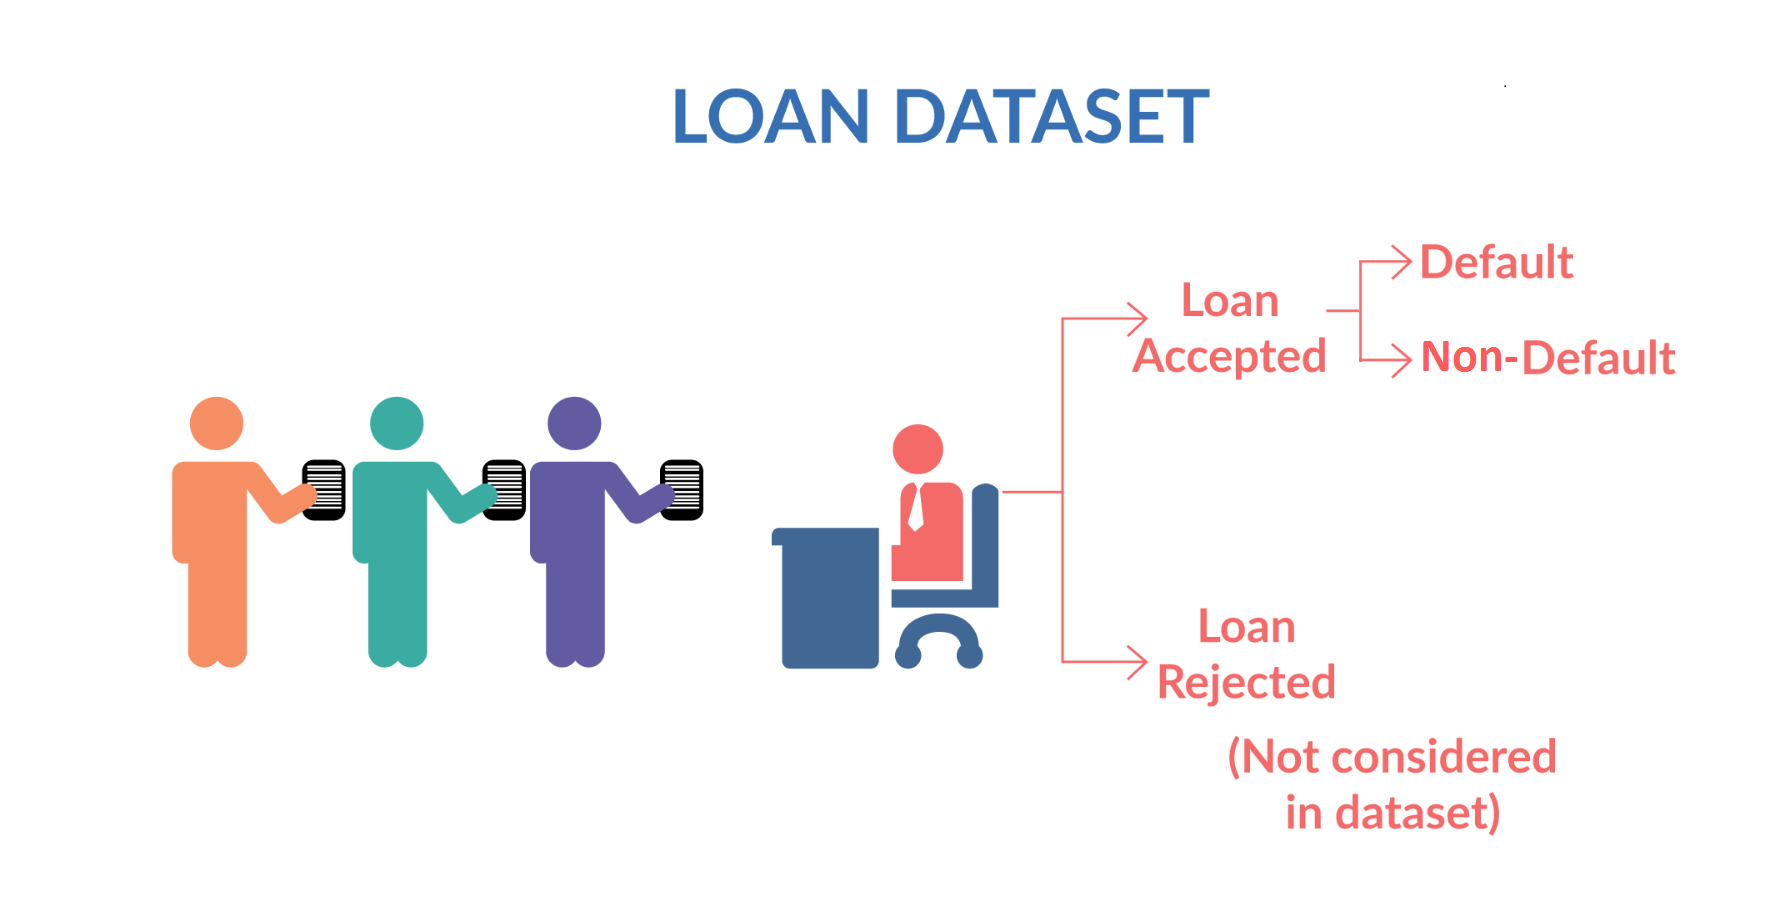


When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
Loan rejected:The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In [1]:
## Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
## Load Dataset

path = 'C:/Upgrad/loan/loan.csv'
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

df_loan = pd.read_csv(path, error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [4]:
df_loan.shape

(39717, 111)

# Now data needs to be cleaned for following 

Find usefull cloumns

Fix missing values

Standardise values

Fix invalid values

Filter data

In [5]:
percent_missing = df_loan.isnull().sum() * 100 / len(df_loan)

missing_value_df = pd.DataFrame({'column_name': df_loan.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [6]:
print('percent_missing ', percent_missing)
print(missing_value_df.head(5))

percent_missing  id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                    

In [7]:
# List of columns having NULL values
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] == 100.00)].column_name.tolist()

In [8]:
missing_values_columns

['num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_ut

In [9]:
## Drop columns having missing values

df_loan_updated = df_loan.drop(missing_values_columns, axis=1)

In [10]:
df_loan_updated.shape

(39717, 57)

In [11]:
df_loan_updated = df_loan_updated.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [12]:
df_loan_updated.shape

(39717, 50)

In [13]:
## Remove columns which do not have any value in analysis

df_loan_updated = df_loan_updated.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [14]:
df_loan_updated.shape

(39717, 41)

In [15]:
## Deleting string columns having most of as unique values
df_loan_updated = df_loan_updated.drop(['emp_title'], axis=1)

In [16]:
## Check % missing data in each column


((df_loan_updated.isnull().sum() * 100 / len(df_loan_updated)).sort_values(
    ascending=False)).head(11)

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
total_pymnt            0.00
pub_rec                0.00
revol_bal              0.00
total_acc              0.00
out_prncp              0.00
dtype: float64

In [17]:
## Lets identify categorical columns 

cat_data = []
for row in df_loan_updated.columns.tolist():
    cat_data.append({'column': row, 'count': len(df_loan_updated[row].unique())})

In [18]:
cat_data_sorted = pd.DataFrame(cat_data).sort_values('count')

In [19]:
cat_data_sorted.head()

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5


In [20]:
# null_columns_dropped_data[null_columns_dropped_data.isnull().sum(axis=1) >= 2]

df_loan_updated['term_months'] = df_loan_updated['term'].str.rstrip('months')
del df_loan_updated['term']

df_loan_updated['int_rate_percentage'] = df_loan_updated['int_rate'].str.rstrip('%')
del df_loan_updated['int_rate']

df_loan_updated['emp_length_years'] = df_loan_updated['emp_length'].str.rstrip('years ')
df_loan_updated['emp_length_years'].replace({'10+': '10'}, inplace=True)
df_loan_updated['emp_length_years'][df_loan_updated['emp_length_years'] == '< 1'] = '0.5'
del df_loan_updated['emp_length']

df_loan_updated['revol_util_percentage'] = df_loan_updated['revol_util'].str.rstrip('%')
del df_loan_updated['revol_util']

In [21]:
df_loan_updated['issue_d_month'], df_loan_updated['issue_d_year'] = df_loan_updated[
    'issue_d'].str.split('-').str

df_loan_updated['last_credit_pull_d_month'], df_loan_updated['last_credit_pull_d_year'] = df_loan_updated[
    'last_credit_pull_d'].str.split('-').str

df_loan_updated['last_pymnt_d_month'], df_loan_updated['last_pymnt_d_year'] = df_loan_updated[
    'last_pymnt_d'].str.split('-').str

df_loan_updated['earliest_cr_line_month'], df_loan_updated['earliest_cr_line_year'] = df_loan_updated[
    'earliest_cr_line'].str.split('-').str

df_loan_updated['issue_d_year'] = '20' + df_loan_updated['issue_d_year']

<ipython-input-21-1215b76ef17b>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan_updated['issue_d_month'], df_loan_updated['issue_d_year'] = df_loan_updated[
<ipython-input-21-1215b76ef17b>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan_updated['last_credit_pull_d_month'], df_loan_updated['last_credit_pull_d_year'] = df_loan_updated[
<ipython-input-21-1215b76ef17b>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan_updated['last_pymnt_d_month'], df_loan_updated['last_pymnt_d_year'] = df_loan_updated[
<ipython-input-21-1215b76ef17b>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan_updated['earliest_cr_line_month'], df_loan_updated['earliest_cr_line_year'] = df_loan_updated[


In [22]:
## Change column datatype to float

columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
df_loan_updated[columns] = df_loan_updated[columns].astype(np.float64)

In [23]:
## Lets derive more columns - profit and loss


df_loan_updated['PnL']=(
    df_loan_updated['total_pymnt']-df_loan_updated['funded_amnt']
)*100/df_loan_updated['funded_amnt']

In [24]:
df_loan_updated['loan_inc_ratio'
                         ] = df_loan_updated.funded_amnt*100/df_loan_updated.annual_inc


columns = ['total_acc', 'term_months', 'issue_d_year']
df_loan_updated[columns] = df_loan_updated[columns].astype(np.int64)


columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
df_loan_updated[columns] = df_loan_updated[columns].apply(lambda x: x.astype('category'))


df_loan_updated['annual_inc_lakhs'] = df_loan_updated['annual_inc'] / 1000

In [25]:
df_loan_updated['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [26]:
## We will remove current loan status as it is not needed

df_loan_updated = df_loan_updated[df_loan_updated.loan_status !='Current']
df_loan_updated = df_loan_updated.loc[:,df_loan_updated.nunique()!=1]

In [27]:
## Now we will do EDA on this dataset 

## Final dataset for Exploratory Data Analytics
df_final = df_loan_updated

In [28]:
df_final["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

# Univariate Analysis

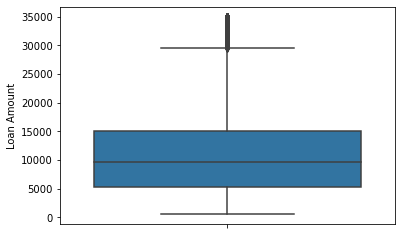

In [29]:
import matplotlib.pyplot as plt

sns.boxplot( y=df_final["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()


## From above box plot the inference that can be made is - 

###  Loan amount ranges from 0 to 35000
###  Mean of loan is around 10000
###  3rd quartile is around 15000

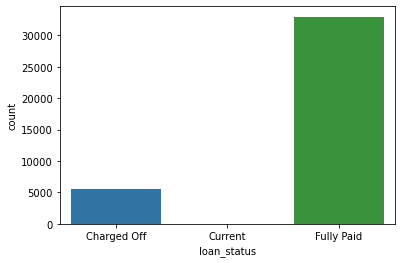

In [30]:
sns.countplot(x= df_final["loan_status"])
plt.show()

## Inference 

#### Most of the loans are fully paid
#### Very less loans are there which are charged off

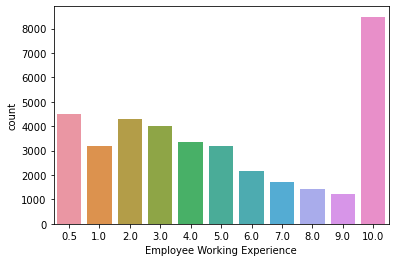

In [31]:
## Lets make inference based on emp work experience 

sns.countplot(x='emp_length_years', data=df_final)
plt.xlabel('Employee Working Experience')
plt.show()

### Inference 

#### High percentage of employees having 10+ years of work experience 

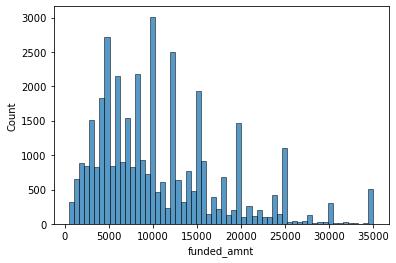

In [32]:
sns.histplot(df_final['funded_amnt'])
plt.show()

### Inference 

#### Most of loans were within range 5000 - 10000

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


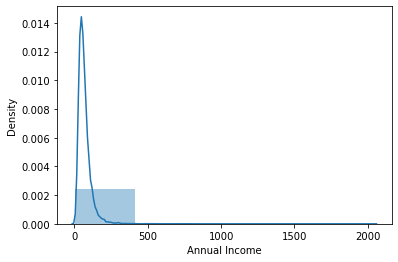

In [33]:
sns.distplot(df_final[df_final['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income')
plt.show()

### Inference 

#### Majority of loan applicants have annual income less than 5 lakh

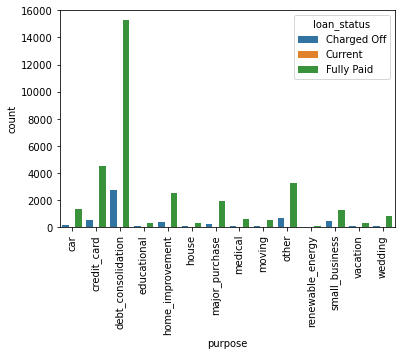

In [34]:
sns.countplot(x='purpose', hue="loan_status", data=df_final)
plt.xticks(rotation=90)
plt.show()

### Inference 

#### Debt_consolidation is major reason for taking loan
#### Next highest reason is credt_card payment 

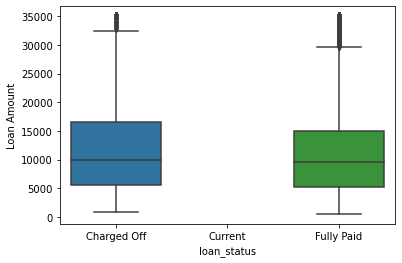

In [35]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df_final)
plt.ylabel('Loan Amount')
plt.show()

### Inference 

#### Mean of charged off and fully Paid is same. Both have mean around 10000

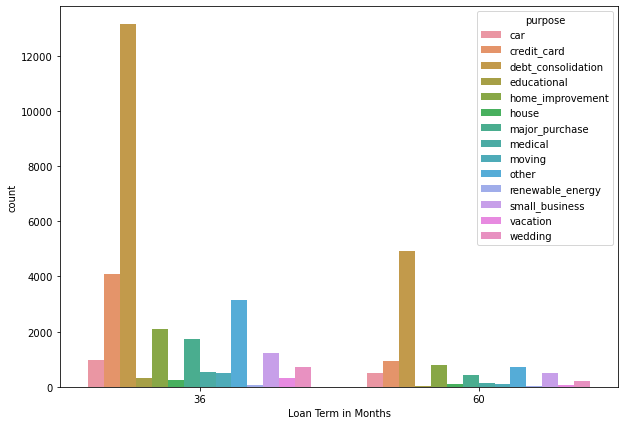

In [36]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df_final)
plt.xlabel('Loan Term in Months')
plt.show()

### Inference 

#### Debt consolidation loans are secure one and are paid off

## Bivariate Analysis 

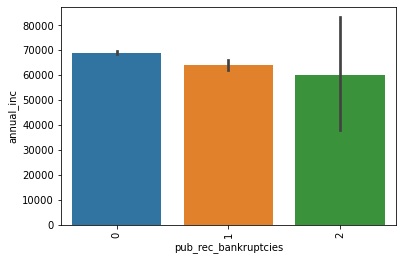

In [37]:
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=df_final)
plt.xticks(rotation=90)
plt.show()

###  Heatmap

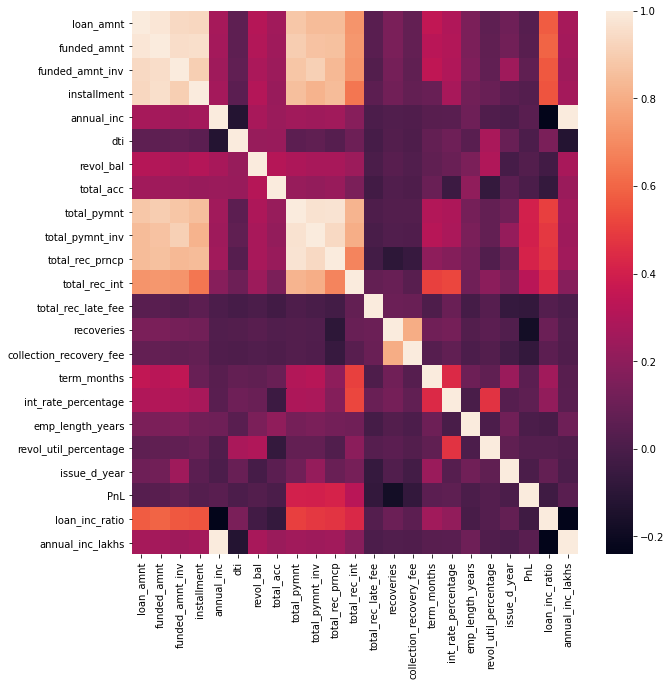

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr())
plt.show()

### Inference 

#### Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

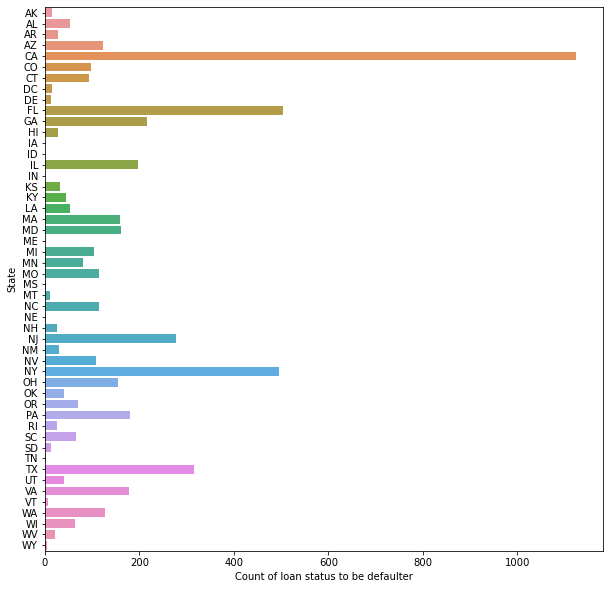

In [41]:
g = df_final[df_final['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

### Inference 

#### California, florida , Newyork and Texas have high probablity for default

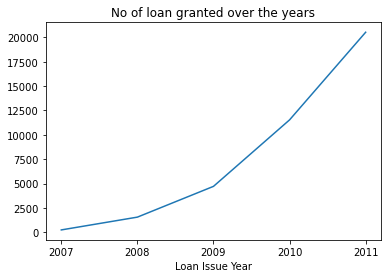

In [42]:
g = df_final.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

### Inference 

#### There is constant increase in loan applications for period 2007 - 2011

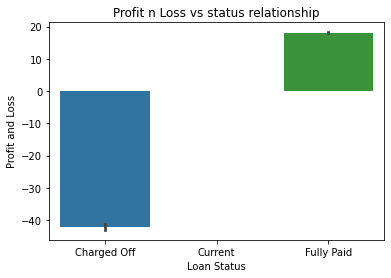

In [43]:
sns.barplot(x='loan_status',y='PnL',data=df_final)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

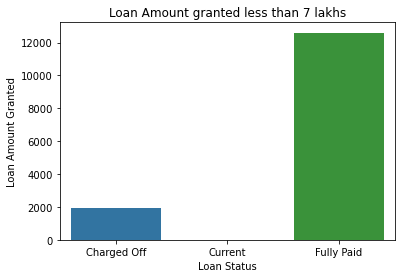

In [44]:
df_agg = df_final[df_final['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

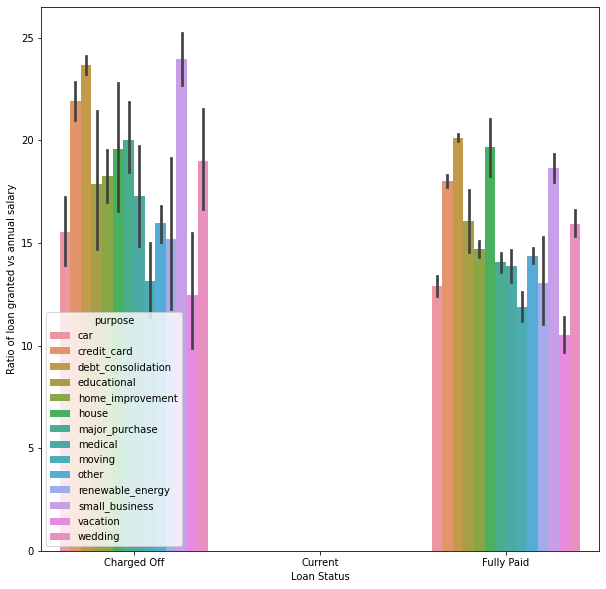

In [45]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df_final)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()